In [1]:
import os 
# Set CUDA device
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Disable XLA compilation
os.environ["TF_XLA_FLAGS"] = ""


In [ ]:
import tensorflow as tf
from tensorflow.summary import FileWriter

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

In [3]:
sess = tf.Session()



2023-05-29 15:02:33.743723: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2023-05-29 15:02:33.911533: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:07:00.0
2023-05-29 15:02:33.912125: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2023-05-29 15:02:33.915350: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.10.0
2023-05-29 15:02:33.918048: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcufft.so.10.0
2023-05-29 15:02:33.919767: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcurand.so.10.0
2023-05-29 15:02:33.923361: I tensorflow/stream_executor

In [4]:
log_dir = "/home/perm/ProteinGAN/data/log/events.out.tfevents.1684896344.nscl-2"
summary_writer = FileWriter(log_dir, sess.graph)

2023-05-29 15:02:34.506591: E tensorflow/core/util/events_writer.cc:108] Write failed because file could not be opened.
2023-05-29 15:02:34.508339: E tensorflow/core/util/events_writer.cc:108] Write failed because file could not be opened.


In [5]:
events = tf.train.summary_iterator(log_dir)
steps = []
loss_values = []
val_identities = []
events_collection = {}

In [6]:
for event in events:
    for value in event.summary.value:
        #print(value.tag )
        events_collection[value.tag] = value.simple_value
        if value.tag == "Blast/val/Identity":
            steps.append(event.step)
            val_identities.append(value.simple_value)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed
value tag sec executed


In [10]:
print(len(val_identities))

16


In [9]:
steps

[1,
 1201,
 2401,
 3601,
 4801,
 7201,
 8401,
 9601,
 10801,
 12001,
 13201,
 14401,
 15601,
 16801,
 18001,
 19201]

In [8]:
'''import json 
with open("events_collection.json", 'w') as f:
    json.dump(events_collection, f)'''

'import json \nwith open("events_collection.json", \'w\') as f:\n    json.dump(events_collection, f)'

In [12]:
import matplotlib.pyplot as plt

In [ ]:
import plotter_util as plotter
plotter.simple_plot(steps, val_identities, 'Training Steps', 'Identity',
                    'Generated Cov Seq Identity to Natural Ones(%) ','seq_identity.png' )

2023-05-30 11:18:13.349943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:07:00.0
2023-05-30 11:18:13.350228: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2023-05-30 11:18:13.350268: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.10.0
2023-05-30 11:18:13.350299: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcufft.so.10.0
2023-05-30 11:18:13.350327: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcurand.so.10.0
2023-05-30 11:18:13.350352: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcusolver.so.10.0
2023-05-30 11:18:13.350405: I tensorflow/stream_e

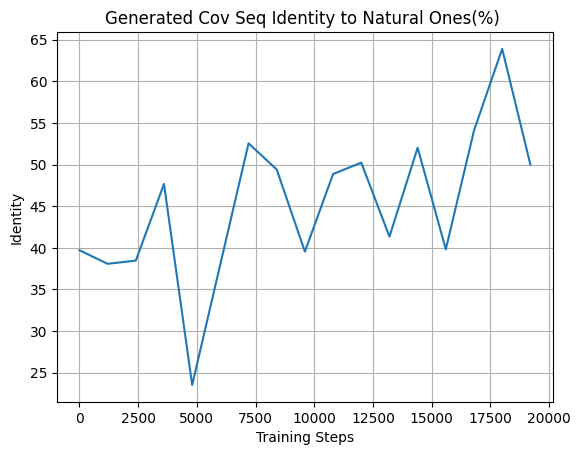

In [21]:
import plot_generator as plot_generator
log_dir = "/home/perm/ProteinGAN/data/log/events.out.tfevents.1684896344.nscl-2"
events = plot_generator.read_summary_events(log_dir)
validation_stats = plot_generator.get_val_identity_stats(events)
plotter.simple_plot_by_dictionary(validation_stats, 'Training Steps', 'Identity',
                'Generated Cov Seq Identity to Natural Ones(%) ','seq_identity1.png')

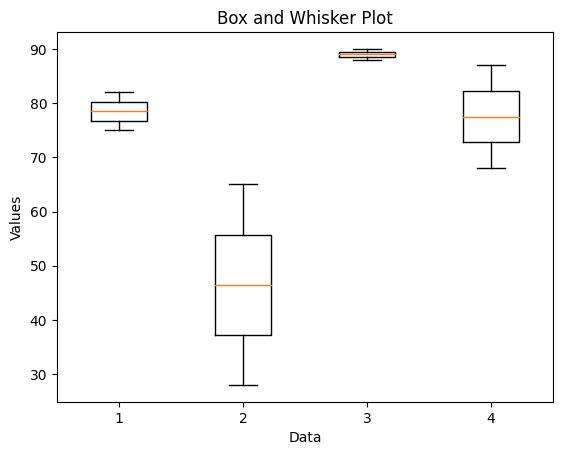

In [28]:
import matplotlib.pyplot as plt

# Sample data
#data = [75, 82, 68, 87, 78, 80, 72, 90, 88, 95, 70, 82]
data = [[75, 82] , [28, 65], [90, 88], [68, 87]]
x = [1200, 2400, 3600, 4800]
# Create a figure and axes
fig, ax = plt.subplots()

# Create the box and whisker plot
ax.boxplot(data)

# Add labels and title
ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box and Whisker Plot')

# Show the plot
plt.show()


In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE





In [ ]:
# Step 1: Load the trained model
sess = tf.Session()
saver = tf.train.import_meta_graph('/home/perm/ProteinGAN/data/log/model.ckpt-20000.meta')
saver.restore(sess, tf.train.latest_checkpoint('/home/perm/ProteinGAN/data/log'))

In [53]:
# Step 2: Extract feature vectors
graph = tf.get_default_graph()

In [55]:
#Print all tensors 
all_tensors = [n.name for n in graph.as_graph_def().node]
# Print the list of tensors
for tensor_name in all_tensors:
    print(tensor_name)


In [58]:
# Print the operations (layers) in the graph
for op in graph.get_operations():
    print(op.name)

matching_filenames/MatchingFiles/pattern
matching_filenames/MatchingFiles
matching_filenames
matching_filenames/Assign
matching_filenames/read
init
matching_filenames_1/MatchingFiles/pattern
matching_filenames_1/MatchingFiles
matching_filenames_1
matching_filenames_1/Assign
matching_filenames_1/read
matching_filenames_2/MatchingFiles/pattern
matching_filenames_2/MatchingFiles
matching_filenames_2
matching_filenames_2/Assign
matching_filenames_2/read
matching_filenames_3/MatchingFiles/pattern
matching_filenames_3/MatchingFiles
matching_filenames_3
matching_filenames_3/Assign
matching_filenames_3/read
init_1
matching_filenames_4/MatchingFiles/pattern
matching_filenames_4/MatchingFiles
matching_filenames_4
matching_filenames_4/Assign
matching_filenames_4/read
init_2
noise/shape
noise/mean
noise/stddev
noise/TruncatedNormal
noise/mul
noise
global_step/Initializer/zeros
global_step
global_step/Assign
global_step/read
model/AssignAdd/value
model/AssignAdd
model/tensors/normalize_tensors/comp

In [59]:
import datetime

current_date = datetime.date.today()
current_time = datetime.time(14, 30, 45, 123456)  # Hours, minutes, seconds, microseconds

current_datetime = datetime.datetime.combine(current_date, current_time)

formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S.%f")

print("Formatted Date and Time:", formatted_datetime)


Formatted Date and Time: 2023-06-07 14:30:45.123456


In [ ]:
locs, labels = xticks()  # Get the current locations and labels.
xticks(np.arange(0, 1, step=0.2))  # Set label locations.
xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])  # Set text labels.
xticks([0, 1, 2], ['January', 'February', 'March'],
       rotation=20)  # Set text labels and properties.
xticks([])  # Disable xticks.